# Importing the global height data
## source: 

In [1]:
# importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pprint import pprint

### Importing raw file

In [2]:

# athlete events df from csv
global_file = os.path.join("..","data", "rawData","NCD_RisC_eLife_2016_height_age18_countries.txt")
global_df = pd.read_csv(global_file, encoding="ISO-8859-1")

# To get the raw data count, commented out to keep the original df .head() results prominent
raw_count = len(global_df)

# preview the raw data
global_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077


### Check for nulls...

In [3]:
# checking for any null values
pd.isna(global_df).any()

# looks good!


Country                                            False
ISO                                                False
Sex                                                False
Year of birth                                      False
Mean height (cm)                                   False
Mean height lower 95% uncertainty interval (cm)    False
Mean height upper 95% uncertainty interval (cm)    False
dtype: bool

### Grab only 1960-2016, but at estimated Olympic age (since we have DOB)
We may need to add something to year of birth to align the data better.  Someone competing in the 2000 Olympics would have been born sometime in the 1980's.\n 
Maybe we need to grab the median age from olympic data?
For now, setting offset to 20 years...

In [4]:
# variable to store generation offset
age_offset = 20

# new column to show "estimated" year of olympic competition
global_df['Olympic Year'] = global_df['Year of birth'] + age_offset

# verify
# global_df.head()

# now just grab the years we are interested in "Olympic Year" >= 1960 and <= 2016
globalModern = global_df.loc[global_df['Olympic Year']>=1960]

globalModern

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Olympic Year
44,Afghanistan,AFG,Men,1940,163.438996,158.235582,168.720947,1960
45,Afghanistan,AFG,Men,1941,163.504155,158.335069,168.802901,1961
46,Afghanistan,AFG,Men,1942,163.570066,158.404699,168.860023,1962
47,Afghanistan,AFG,Men,1943,163.638285,158.456715,168.937749,1963
48,Afghanistan,AFG,Men,1944,163.708753,158.488334,168.986865,1964
49,Afghanistan,AFG,Men,1945,163.781053,158.608246,169.085754,1965
50,Afghanistan,AFG,Men,1946,163.855399,158.694542,169.134287,1966
51,Afghanistan,AFG,Men,1947,163.931093,158.780156,169.205013,1967
52,Afghanistan,AFG,Men,1948,164.007381,158.834680,169.278362,1968
53,Afghanistan,AFG,Men,1949,164.083229,158.891296,169.349037,1969


### Now only go every 4 years...

In [6]:
# lol, there should be an easier way, just hard coded for now...
olympic_yrs = [1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

# make it a dataframe
olympicYr_df = pd.DataFrame({
    'Olympic Year': olympic_yrs
})

olympicYr_df

# now merge with global height data
globalOlympic = pd.merge(globalModern,olympicYr_df, on='Olympic Year', how='inner')

# # looking at it
globalOlympic.head(20)




,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Olympic Year
0,Afghanistan,AFG,Men,1940,163.438996,158.235582,168.720947,1960
1,Albania,ALB,Men,1940,169.648313,167.315784,171.914644,1960
2,Algeria,DZA,Men,1940,169.681490,168.294056,171.066134,1960
3,American Samoa,ASM,Men,1940,171.572884,170.698323,172.471518,1960
4,Andorra,AND,Men,1940,169.272019,164.217715,174.327118,1960
5,Angola,AGO,Men,1940,167.136859,161.818527,172.428728,1960
6,Antigua and Barbuda,ATG,Men,1940,169.217171,164.143165,174.243304,1960
7,Argentina,ARG,Men,1940,169.434674,167.816878,171.034890,1960
8,Armenia,ARM,Men,1940,169.094857,166.593290,171.516715,1960
9,Australia,AUS,Men,1940,174.667498,174.122927,175.207059,1960


### Convert to Imperial

In [7]:
# conver the height stuff
globalOlympic['Mean height (inches)'] = globalOlympic['Mean height (cm)'].apply(lambda x: x / 2.54)
globalOlympic['Mean height lower 95% uncertainty interval (inches)'] = globalOlympic['Mean height lower 95% uncertainty interval (cm)'].apply(lambda x: x / 2.54)
globalOlympic['Mean height upper 95% uncertainty interval (inches)'] = globalOlympic['Mean height upper 95% uncertainty interval (cm)'].apply(lambda x: x / 2.54)

# looking at new columns
globalOlympic.head()


,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Olympic Year,Mean height (inches),Mean height lower 95% uncertainty interval (inches),Mean height upper 95% uncertainty interval (inches)
0,Afghanistan,AFG,Men,1940,163.438996,158.235582,168.720947,1960,64.346061,62.297473,66.425570
1,Albania,ALB,Men,1940,169.648313,167.315784,171.914644,1960,66.790674,65.872356,67.682931
2,Algeria,DZA,Men,1940,169.681490,168.294056,171.066134,1960,66.803736,66.257502,67.348872
3,American Samoa,ASM,Men,1940,171.572884,170.698323,172.471518,1960,67.548380,67.204064,67.902173
4,Andorra,AND,Men,1940,169.272019,164.217715,174.327118,1960,66.642527,64.652644,68.632724


### avg the averages

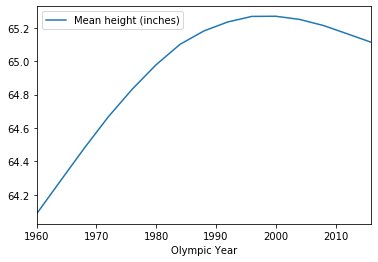

In [11]:
avg_df = pd.DataFrame(globalOlympic.groupby('Olympic Year')['Mean height (inches)'].mean().reset_index())

avg_df.head(20)

# plot for fun
avg_df.plot('Olympic Year','Mean height (inches)')

### save clean data to csv, to be used when datasets are combined

In [12]:
full_file = os.path.join("..", "data", "cleanData", "GlobalHeights_byCountry.csv")
globalOlympic.to_csv(full_file, index=False, header=True)

full_file = os.path.join("..", "data", "cleanData", "GlobalHeights_Avg.csv")
avg_df.to_csv(full_file, index=False, header=True)
